# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint 

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "https://api.openweathermap.org/data/2.5/weather?"
units="imperial"
query = f"{url}appid={weather_api_key}&units={units}&q="
#print(query)

In [4]:
#Example:Paris
ex_city = "paris"
ex_query = query + ex_city 
#print(ex_query)
#response = requests.get(ex_query).json()
#pprint(response)

In [5]:
print(f"Beginning Data Retrieval")
print(f"-----------------------------")

city_name=[]
lat=[]
lng=[]
max_temp=[]
humidity=[]
cloudiness=[]
wind_speed=[]
country=[]
date=[]

num = 1

for city in cities:
    try:
        query_url = query + city
        response = requests.get(query_url).json()
        city_name.append(response["name"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        print(f"Processing Record {num}: {city}")
        num += 1
    except:
        print("City not found. Skipping...")
        
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")


Beginning Data Retrieval
-----------------------------
Processing Record 1: atuona
Processing Record 2: puerto ayora
Processing Record 3: dingle
Processing Record 4: east london
Processing Record 5: ponta do sol
Processing Record 6: paka
Processing Record 7: portland
Processing Record 8: busselton
Processing Record 9: abha
Processing Record 10: alice springs
Processing Record 11: cape town
Processing Record 12: rikitea
Processing Record 13: hobart
Processing Record 14: severnyy
Processing Record 15: qaanaaq
Processing Record 16: bluff
Processing Record 17: cherskiy
Processing Record 18: esperance
Processing Record 19: keetmanshoop
Processing Record 20: tuktoyaktuk
Processing Record 21: gladstone
Processing Record 22: mahebourg
Processing Record 23: muros
Processing Record 24: gobabis
Processing Record 25: arraial do cabo
Processing Record 26: albany
Processing Record 27: carnarvon
Processing Record 28: ushuaia
Processing Record 29: lagoa
Processing Record 30: tasiilaq
City not found. S

City not found. Skipping...
City not found. Skipping...
Processing Record 235: cockburn town
Processing Record 236: hun
Processing Record 237: north platte
Processing Record 238: ketchikan
Processing Record 239: makakilo city
City not found. Skipping...
Processing Record 240: marfino
Processing Record 241: ambilobe
Processing Record 242: pfarrkirchen
Processing Record 243: obo
City not found. Skipping...
Processing Record 244: carauari
Processing Record 245: bethel
Processing Record 246: pevek
Processing Record 247: zurrieq
Processing Record 248: torbay
Processing Record 249: koslan
Processing Record 250: amga
City not found. Skipping...
Processing Record 251: erzin
Processing Record 252: weiser
Processing Record 253: onguday
Processing Record 254: mastic beach
Processing Record 255: walvis bay
Processing Record 256: broken hill
Processing Record 257: huarmey
City not found. Skipping...
Processing Record 258: kahului
Processing Record 259: benguela
Processing Record 260: puerto rico
Ci

Processing Record 464: raudeberg
Processing Record 465: lombardia
Processing Record 466: guayaramerin
Processing Record 467: placido de castro
Processing Record 468: hervey bay
Processing Record 469: nabire
Processing Record 470: yabassi
Processing Record 471: kiruna
Processing Record 472: calolziocorte
Processing Record 473: borogontsy
Processing Record 474: beringovskiy
Processing Record 475: stromness
Processing Record 476: yarim
Processing Record 477: riachao do jacuipe
Processing Record 478: plouzane
Processing Record 479: acapulco
City not found. Skipping...
Processing Record 480: caernarfon
Processing Record 481: marinette
Processing Record 482: nikolayevsk-na-amure
Processing Record 483: pacific grove
Processing Record 484: pathein
Processing Record 485: hofn
Processing Record 486: homer
Processing Record 487: catamarca
Processing Record 488: ulaangom
Processing Record 489: jiwani
Processing Record 490: saldanha
Processing Record 491: ladybrand
City not found. Skipping...
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_dict = {
    "City":city_name,
    "Lat":lat,
    "Lng":lng,
    "Max Temp":max_temp,
    "Humidity":humidity,
    "Cloudiness":cloudiness,
    "Wind Speed":wind_speed,
    "Country":country,
    "Date":date
}
weather_data = pd.DataFrame(weather_dict)  

In [7]:
weather_data.count()

City          557
Lat           557
Lng           557
Max Temp      557
Humidity      557
Cloudiness    557
Wind Speed    557
Country       557
Date          557
dtype: int64

In [8]:
#Display the DataFrame
weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Atuona,-9.80,-139.03,77.95,73,26,22.37,PF,1600881410
1,Puerto Ayora,-0.74,-90.35,71.01,83,93,7.00,EC,1600881411
2,Dingle,11.00,122.67,76.06,88,60,1.36,PH,1600881411
3,East London,-33.02,27.91,64.40,77,5,4.70,ZA,1600881412
4,Ponta do Sol,32.67,-17.10,78.80,61,40,11.41,PT,1600881412


In [9]:
#Export the city data into a .csv.
weather_data.to_csv("weather.csv", index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,5.570000e+02
mean,23.318671,19.030305,65.413573,68.901257,47.845601,7.716804,1.600882e+09
std,33.537337,91.960458,16.857928,21.269070,37.161584,5.599794,1.189779e+02
min,-54.800000,-175.200000,16.200000,10.000000,0.000000,0.360000,1.600881e+09
25%,-5.200000,-59.530000,51.800000,58.000000,11.000000,4.000000,1.600881e+09
50%,31.610000,21.380000,68.000000,74.000000,40.000000,6.710000,1.600882e+09
75%,51.290000,103.440000,78.300000,85.000000,86.000000,10.290000,1.600882e+09
max,78.220000,179.320000,105.190000,100.000000,100.000000,46.080000,1.600882e+09


In [11]:
outliers = weather_data[weather_data.Humidity > 100]
outliers
#no cities that have humidity > 100%

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [12]:
clean_city_data = weather_data[weather_data.Humidity <= 100]
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Atuona,-9.80,-139.03,77.95,73,26,22.37,PF,1600881410
1,Puerto Ayora,-0.74,-90.35,71.01,83,93,7.00,EC,1600881411
2,Dingle,11.00,122.67,76.06,88,60,1.36,PH,1600881411
3,East London,-33.02,27.91,64.40,77,5,4.70,ZA,1600881412
4,Ponta do Sol,32.67,-17.10,78.80,61,40,11.41,PT,1600881412


In [13]:
clean_city_data.to_csv("Clean_City.csv")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

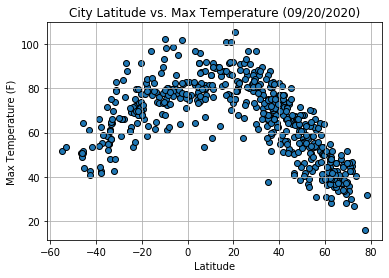

In [14]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Max Temp"], marker="o", edgecolor="black")
plt.grid(True)
plt.title("City Latitude vs. Max Temperature (09/20/2020)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")

plt.savefig("Latitude_vs_Temperature")

plt.show()

## Latitude vs. Humidity Plot

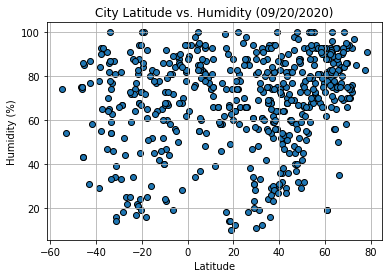

In [15]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Humidity"], marker="o", edgecolor="black")
plt.grid(True)
plt.title("City Latitude vs. Humidity (09/20/2020)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

plt.savefig("Latitude_vs_Humidity")

plt.show()

## Latitude vs. Cloudiness Plot

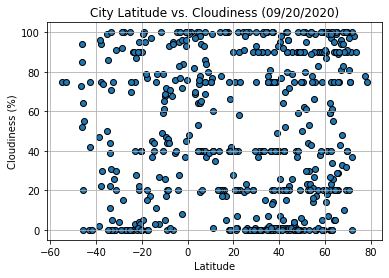

In [16]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Cloudiness"], marker="o", edgecolor="black")
plt.grid(True)
plt.title("City Latitude vs. Cloudiness (09/20/2020)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

plt.savefig("Latitude_vs_Cloudiness")

plt.show()

## Latitude vs. Wind Speed Plot

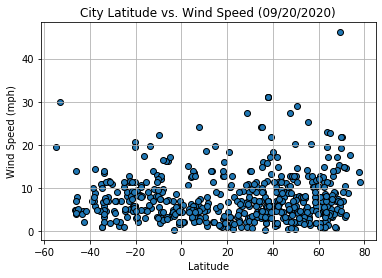

In [17]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Wind Speed"], marker="o", edgecolor="black")
plt.grid(True)
plt.title("City Latitude vs. Wind Speed (09/20/2020)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")

plt.savefig("Latitude_vs_Wind_Speed")

plt.show()

## Linear Regression

In [18]:
# Create Northern and Southern Hemisphere DataFrames
north_hem = clean_city_data.loc[clean_city_data["Lat"] >= 0]
south_hem = clean_city_data.loc[clean_city_data["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [19]:
#OPTIONAL: Create a function to create Linear Regression plots
def linear_regression(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,xy=(0.2, 0.9), xycoords='axes fraction', fontsize=15, color="red")
    print(f"The r-square is: {round(rvalue**2,2)}")

The r-square is: 0.69


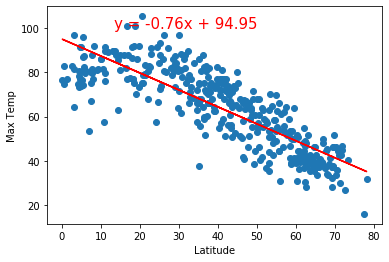

In [20]:
linear_regression(north_hem["Lat"], north_hem["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

plt.savefig("latitude_temp_north")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-square is: 0.5


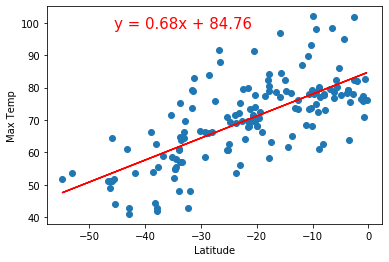

In [21]:
linear_regression(south_hem["Lat"], south_hem["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

plt.savefig("latitude_temp_south")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-square is: 0.03


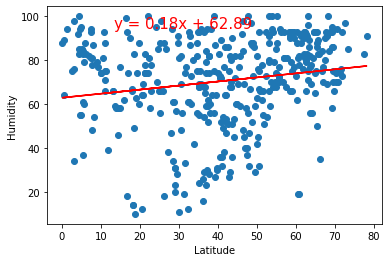

In [22]:
linear_regression(north_hem["Lat"], north_hem["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.savefig("latitude_humidity_north")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-square is: 0.0


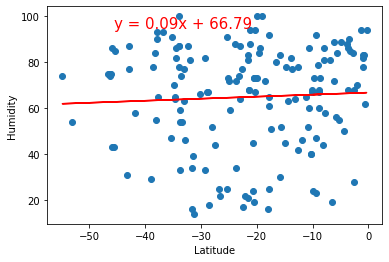

In [23]:
linear_regression(south_hem["Lat"], south_hem["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.savefig("latitude_humidity_south")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-square is: 0.0


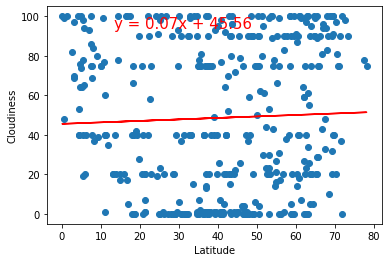

In [24]:
linear_regression(north_hem["Lat"], north_hem["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.savefig("latitude_cloudiness_north")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-square is: 0.02


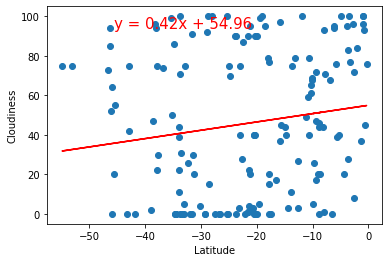

In [25]:
linear_regression(south_hem["Lat"], south_hem["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.savefig("latitude_cloudiness_south")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-square is: 0.01


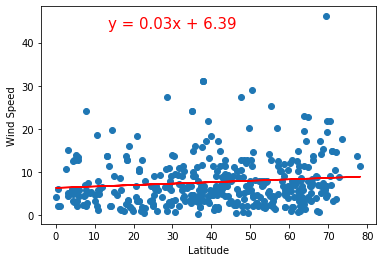

In [26]:
linear_regression(north_hem["Lat"], north_hem["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.savefig("latitude_wind_north")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-square is: 0.01


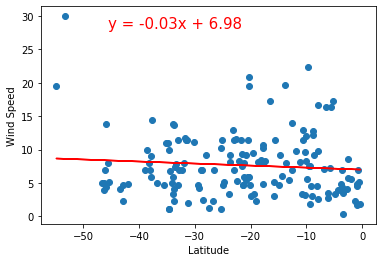

In [27]:
linear_regression(south_hem["Lat"], south_hem["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.savefig("latitude_wind_south")
plt.show()

# Observation

* Latitude is correlated with max temperature (as letitude goes further from 0, max temperature decreases).
* Latitude is not really correlated with humidity.
* Latitude is not really correlated with cloudiness.
* Latitude is not really correlated with wind Speed.